# AlexNet Model | CIFAKE


In [1]:
from keras.layers import Dense, Dropout, Convolution2D, InputLayer, Flatten, MaxPooling2D
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "alexnet_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [6]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            InputLayer((227, 227, 3)),

            Convolution2D(96, (11, 11), strides=4, activation='relu'),
            MaxPooling2D((3, 3), strides=2),

            Convolution2D(256, (5, 5), padding='same', activation='relu'),
            MaxPooling2D((3, 3), strides=2),

            Convolution2D(384, (3, 3), padding='same', activation='relu'),

            Convolution2D(384, (3, 3), padding='same', activation='relu'),

            Convolution2D(256, (3, 3), padding='same', activation='relu'),
            MaxPooling2D((3, 3), strides=2),

            Flatten(),

            Dropout(0.5),
            Dense(4096, activation="relu"),

            Dropout(0.5),
            Dense(4096, activation="relu"),

            Dense(2, activation="softmax"),
        ]
    )

In [4]:
# Model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 384)      

: 

In [7]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path, target_size=(227,227))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [8]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
10000/10000 [==============================] - 1157s 114ms/step - loss: 0.6936 - accuracy: 0.4962 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
10000/10000 [==============================] - 463s 46ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
10000/10000 [==============================] - 463s 46ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
10000/10000 [==============================] - 465s 47ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
10000/10000 [==============================] - 465s 46ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
10000/10000 [==============================] - 466s 47ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
10000/10000 [==============================] - 470s 47ms/step - loss: 0.6932 - accuracy: 0.50

In [9]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/alexnet_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/alexnet_model_cifake/model\assets


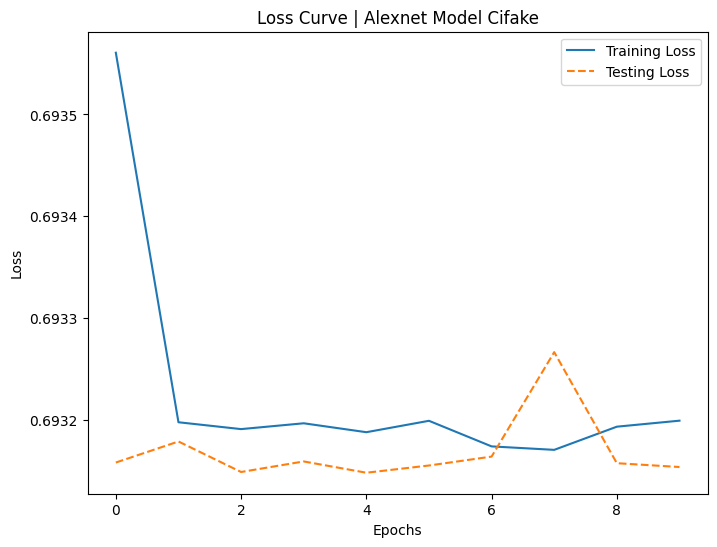

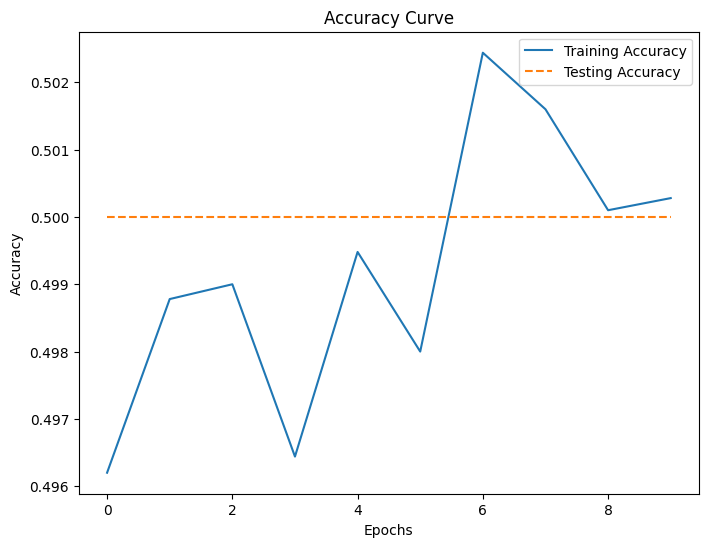

In [10]:
# Plot performance curves
plot_performance_curves(history, model_name)